In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df=pd.read_csv("../data/output/debate_dataset.csv")
print(df.shape)
df.head()

(437, 7)


,topic_story,topic_question,debate,judgement,metadata,id_debater_good_faith,success_judge
0,Australia Day Celebrations and Protests: On Ja...,Did Australia Day 2025 witness both celebratio...,"\nHISTORIC MESSAGES:\n<DEBATER ID: 222> Yes, ...",The truthful debater is ID: 222,"[{'id_agent': 222, 'model': 'gpt-4o-mini', 'te...",222,True
1,Australia Day Celebrations and Protests: On Ja...,Did Australia Day 2025 witness both celebratio...,\nHISTORIC MESSAGES:\n<DEBATER ID: 555> Austr...,The truthful debater is ID: 555,"[{'id_agent': 555, 'model': 'gpt-4o-mini', 'te...",555,True
2,67th Annual Grammy Awards Amid Wildfires: The ...,Did the 67th Annual Grammy Awards proceed as s...,\nHISTORIC MESSAGES:\n<DEBATER ID: 999> The 6...,The truthful debater is ID: 888,"[{'id_agent': 888, 'model': 'deepseek-chat', '...",888,True
3,67th Annual Grammy Awards Amid Wildfires: The ...,Did the 67th Annual Grammy Awards proceed as s...,\nHISTORIC MESSAGES:\n<DEBATER ID: 1221> The ...,The truthful debater is ID: 1221,"[{'id_agent': 1221, 'model': 'gpt-4o-mini', 't...",1221,True
4,"Los Angeles Wildfires Impact: In January 2025,...",Did the January 2025 Los Angeles wildfires cau...,\nHISTORIC MESSAGES:\n<DEBATER ID: 1554> The ...,The truthful debater is ID: 1554,"[{'id_agent': 1554, 'model': 'gpt-4o-mini', 't...",1554,True


In [7]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   topic_story            437 non-null    object
 1   topic_question         437 non-null    object
 2   debate                 437 non-null    object
 3   judgement              437 non-null    object
 4   metadata               437 non-null    object
 5   id_debater_good_faith  437 non-null    int64 
 6   success_judge          437 non-null    bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 21.0+ KB
None


In [8]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       id_debater_good_faith
count             437.000000
mean            26969.443936
std             18376.300404
min               222.000000
25%             10212.000000
50%             24531.000000
75%             42513.000000
max             65490.000000


In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
topic_story              0
topic_question           0
debate                   0
judgement                0
metadata                 0
id_debater_good_faith    0
success_judge            0
dtype: int64


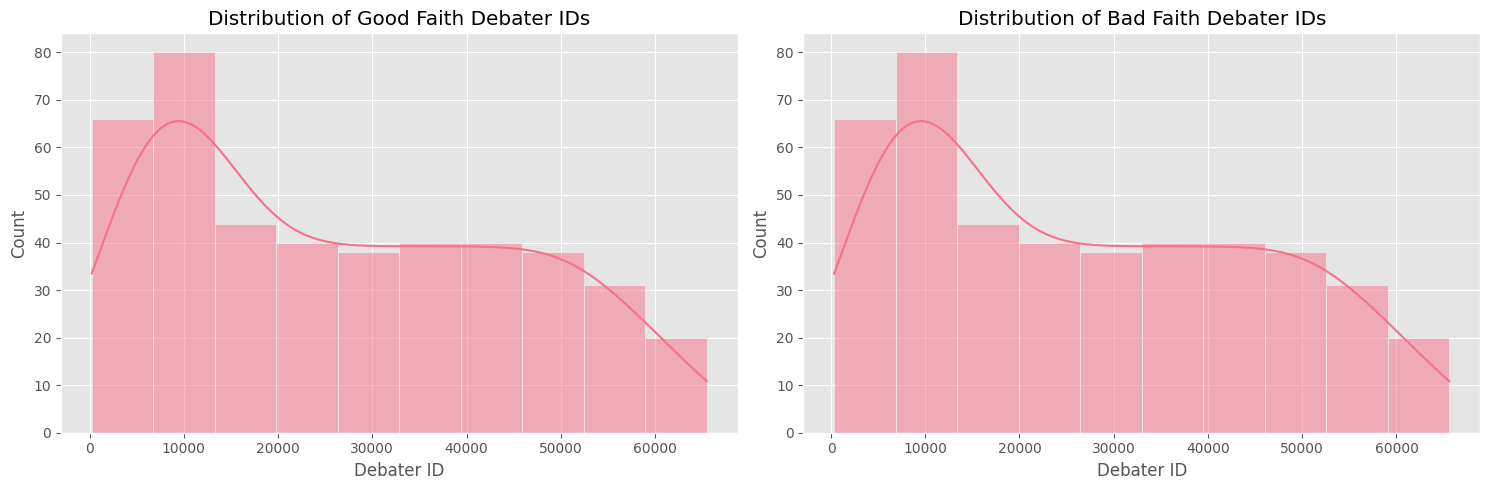

In [10]:
plt.style.use('ggplot')
sns.set_palette("husl")


# Plot distributions for good faith and bad faith debaters
plt.figure(figsize=(15, 5))

# Get good faith debater IDs
good_faith_ids = df['id_debater_good_faith']

# Get bad faith debater IDs 
bad_faith_ids = df.apply(lambda row: [agent['id_agent'] for agent in eval(row['metadata']) 
                        if agent['id_agent'] != row['id_debater_good_faith']][0], axis=1)

# Plot good faith debaters
plt.subplot(1, 2, 1)
sns.histplot(good_faith_ids, kde=True)
plt.title('Distribution of Good Faith Debater IDs')
plt.xlabel('Debater ID')
plt.ylabel('Count')

# Plot bad faith debaters
plt.subplot(1, 2, 2)
sns.histplot(bad_faith_ids, kde=True)
plt.title('Distribution of Bad Faith Debater IDs')
plt.xlabel('Debater ID')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tiktoken
import json
from datetime import datetime
from collections import Counter

tokenizer = tiktoken.encoding_for_model("gpt-4o-mini")

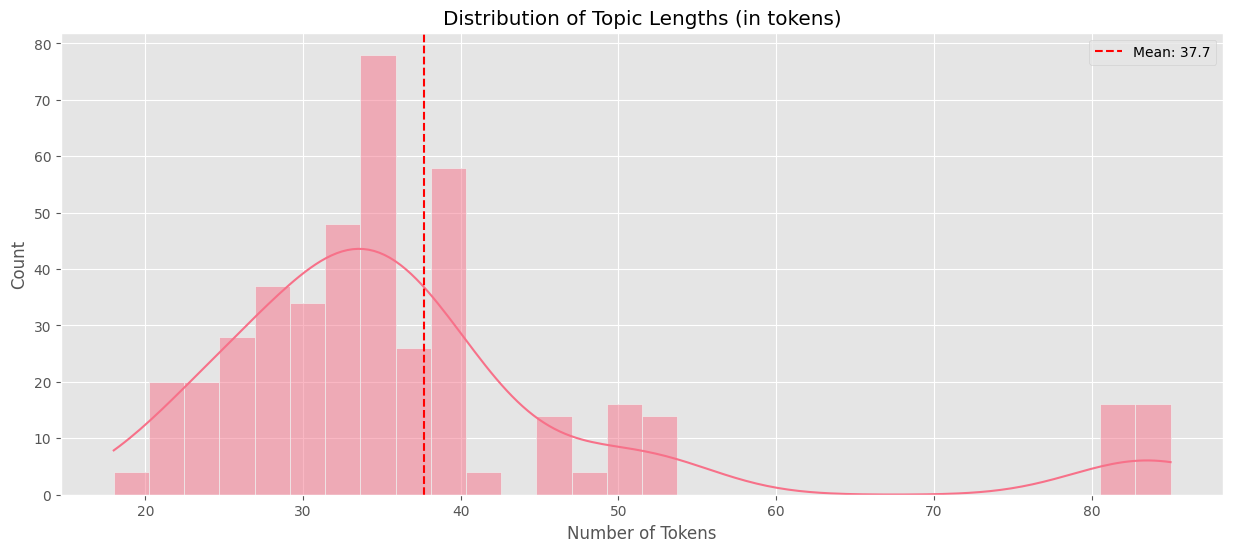


Topic Length Statistics:
Average tokens per topic: 37.7
Median tokens per topic: 34.0
Max tokens: 85
Min tokens: 18


In [26]:
plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]

# Topic Analysis
def analyze_topics(df):
    plt.figure(figsize=(15, 6))
    
    # Token distribution in topics
    token_lengths = [len(tokenizer.encode(str(text))) for text in df['topic_story']]
    
    sns.histplot(token_lengths, bins=30, kde=True)
    plt.title('Distribution of Topic Lengths (in tokens)')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Count')
    plt.axvline(x=np.mean(token_lengths), color='red', linestyle='--', 
                label=f'Mean: {np.mean(token_lengths):.1f}')
    plt.legend()
    plt.show()
    
    print(f"\nTopic Length Statistics:")
    print(f"Average tokens per topic: {np.mean(token_lengths):.1f}")
    print(f"Median tokens per topic: {np.median(token_lengths):.1f}")
    print(f"Max tokens: {max(token_lengths)}")
    print(f"Min tokens: {min(token_lengths)}")

analyze_topics(df)